### Evaluating Classification Models

**OBJECTIVES**
- Use the confusion matrix to evaluate classification models
- Explore lift and gain to evaluate classifiers
- Determine cost of predicting highest probability targets

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import load_breast_cancer, load_digits, fetch_openml

### Evaluating Classifiers

Today, we want to think a bit more about the appropriate classification metrics in different situations.  Please use this [form](https://forms.gle/nU785s3MaQL33xG97) to summarize your work.

### Problem

Below, a dataset with measurements of cancerous and non-cancerous breast tumors is loaded and displayed.  Use `LogisticRegression` and `KNeighborsClassifier` to build predictive models on train/test splits.  Examine the  confusion matrices and explore the classifiers mistakes.  

- Which model do you prefer and why?
- Do you care about predicting each of these classes equally?
- Is there a ratio other than accuracy you think is more important based on the confusion matrix?  

In [11]:
heart = fetch_openml(data_id=43823).frame

In [12]:
heart.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart_Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score

In [38]:
X = heart.iloc[:, :-1]
y = heart['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

In [46]:
lgr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)

In [47]:
scaler = StandardScaler()

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
lgr_pipe = Pipeline([('scale', scaler), ('model', lgr)])
knn_pipe = Pipeline([('scale', scaler), ('model', knn)])

In [50]:
lgr_pipe.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=10))])

In [51]:
#plot confusion matrices

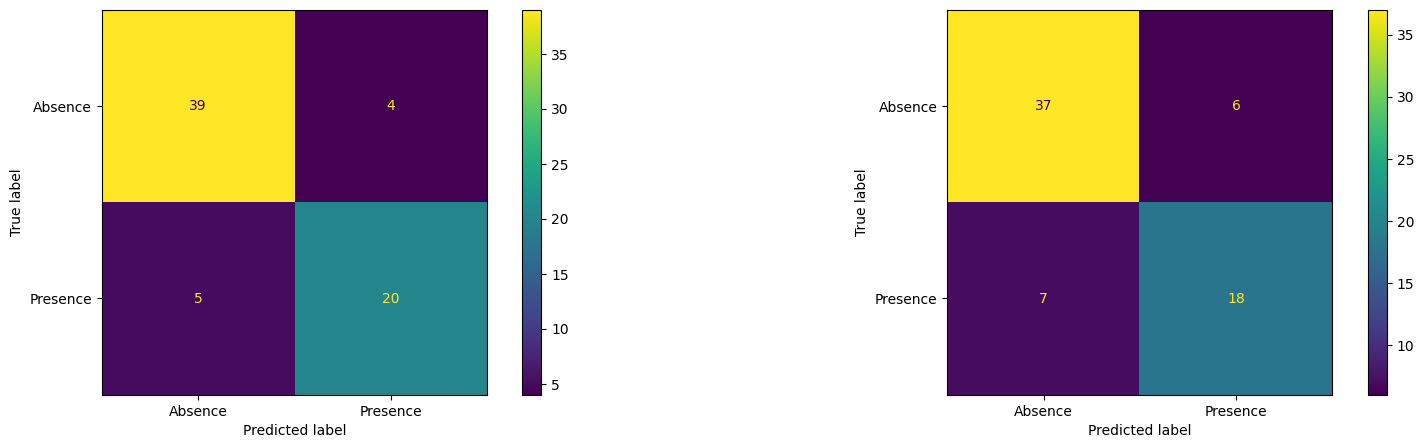

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax[1])

### Problem

Below, a dataset around customer churn is loaded and displayed.  Classification models on the data are given and their confusion matrices.  

- Suppose you want to offer an incentive to customers you think are likely to churn, what is an appropriate evaluation metric? Why?
- Suppose you only have a budget to target 100 individuals you expect to churn.  By targeting the most likely predictions to churn, what percent of churned customers did you capture for each model?

In [22]:
churn = fetch_openml(data_id = 43390).frame

In [23]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
X = churn.iloc[:, :-1]
y = churn['Exited']
X.drop(['Surname', 'RowNumber', 'CustomerId'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

In [25]:
encoder = make_column_transformer((OneHotEncoder(drop = 'first'), ['Geography', 'Gender']),
                                  remainder = StandardScaler())

In [26]:
knn_pipe = Pipeline([('transform', encoder), ('model', KNeighborsClassifier())])
lgr_pipe = Pipeline([('transform', encoder), ('model', LogisticRegression())])

In [27]:
knn_pipe.fit(X_train, y_train)
lgr_pipe.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender'])])),
                ('model', LogisticRegression())])

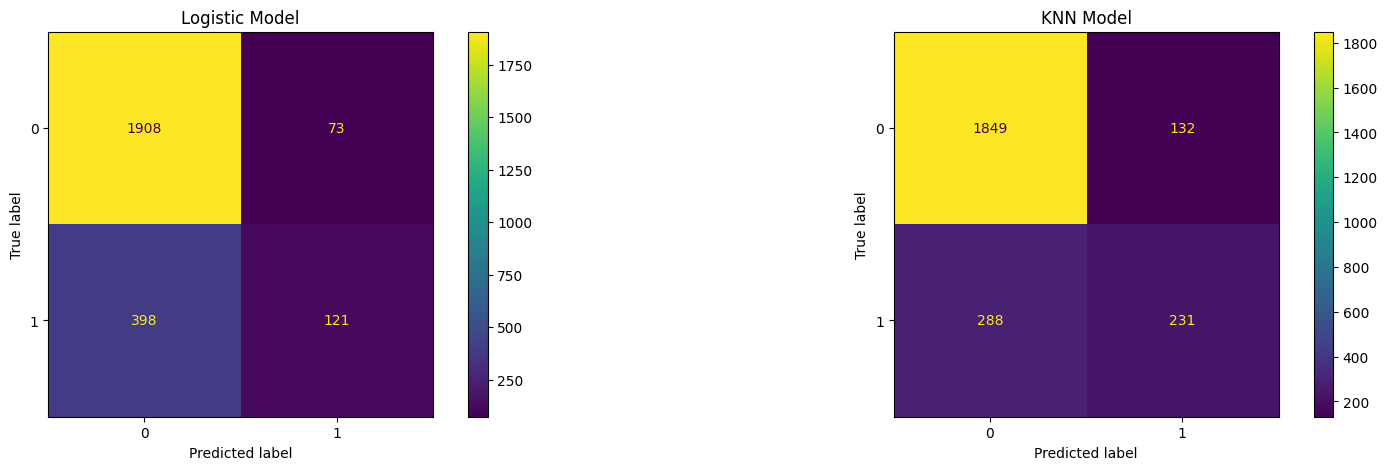

In [34]:
#plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
ax[0].set_title('Logistic Model')
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax[1])
ax[1].set_title('KNN Model');

### Predicting Positives

Return to the churn example and a Logistic Regression model on the data.



1. If you were to make predictions on a random 30% of the data, what percent of the true positives would you expect to capture?

2. Use the predict probability capabilities of the estimator to create a `DataFrame` with the following columns:

| probability of prediction = 1 | true label | 
| -----------  | -------------- |
| .8 | 1 |
| .7 | 1 |
| .4 | 0 |

3. Sort the probabilities from largest to smallest.  What percentage of the total positives are in the first 3000 rows? What does this tell you about your classifier?

### Lift and Gain



from `skplot` [docs](https://scikit-plot.readthedocs.io/en/stable/metrics.html)

- `plot_cumulative_gain`
- `plot_lift_curve`

In [35]:
#pip install scipy==1.11.4
#pip install scikit-plot

In [36]:
import scikitplot as skplot

In [37]:
skplot.metrics.plot_lift_curve?

Signature:
skplot.metrics.plot_lift_curve(
    y_true,
    y_probas,
    title='Lift Curve',
    ax=None,
    figsize=None,
    title_fontsize='large',
    text_fontsize='medium',
)
Docstring:
Generates the Lift Curve from labels and scores/probabilities

The lift curve is used to determine the effectiveness of a
binary classifier. A detailed explanation can be found at
http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html.
The implementation here works only for binary classification.

Args:
    y_true (array-like, shape (n_samples)):
        Ground truth (correct) target values.

    y_probas (array-like, shape (n_samples, n_classes)):
        Prediction probabilities for each class returned by a classifier.

    title (string, optional): Title of the generated plot. Defaults to
        "Lift Curve".

    ax (:class:`matplotlib.axes.Axes`, optional): The axes upon which to
        plot the learning curve. If None, the plot is drawn on a new set of
        axes.

    fi

### Marketing Problem

Below, a dataset relating to a Portugese Bank Marketing Campaign is loaded and displayed.  Your goal is to build a classifier that optimizes to either precision or recall using whichever metric you think is most appropriate.  Draw a lift chart and estimate the lift your classifier has if you were to contact 20% of the customers most likely to subscribe.

In [53]:
bank = fetch_openml(data_id=1461)

In [54]:
print(bank.DESCR)

**Author**: Paulo Cortez, Sérgio Moro
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
**Please cite**: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.       

**Bank Marketing**  
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Attribute information  
For more information, read [Moro et al., 2011].

Input variables:

- bank client data:

1 - age (numeric) 

2 - job : type of job (categorical

In [55]:
bank_df = bank.frame

In [56]:
bank_df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1


In [58]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      45211 non-null  int64   
 1   V2      45211 non-null  category
 2   V3      45211 non-null  category
 3   V4      45211 non-null  category
 4   V5      45211 non-null  category
 5   V6      45211 non-null  int64   
 6   V7      45211 non-null  category
 7   V8      45211 non-null  category
 8   V9      45211 non-null  category
 9   V10     45211 non-null  int64   
 10  V11     45211 non-null  category
 11  V12     45211 non-null  int64   
 12  V13     45211 non-null  int64   
 13  V14     45211 non-null  int64   
 14  V15     45211 non-null  int64   
 15  V16     45211 non-null  category
 16  Class   45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB
